In [11]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Ingresos .csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [12]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [13]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [14]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     object 
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
 4   Trimestre_Label            42 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ KB
None


In [15]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [16]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CABA': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'BUENOS AIRES',
        'CAPITAL FEDERAL': 'BUENOS AIRES',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")


La columna 'Provincia' no existe en el DataFrame.
La columna 'Partido' no existe en el DataFrame.
La columna 'Localidad' no existe en el DataFrame.



Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
               Año  Trimestre  Ingresos (miles de pesos)       Periodo  \
count           42  42.000000               4.200000e+01            42   
unique          12        NaN                        NaN            42   
top     2022-01-01        NaN                        NaN  Abr-Jun 2024   
freq             4        NaN                        NaN             1   
mean           NaN   2.452381               5.001648e+07           NaN   
std            NaN   1.130560               8.710208e+07           NaN   
min            NaN   1.000000               2.984054e+06           NaN   
25%            NaN   1.250000               7.055326e+06           NaN   
50%            NaN   2.000000               2.047527e+07           NaN   
75%            NaN   3.000000               4.485090e+07           NaN   
max            NaN   4.000000               4.420322e+08           NaN   

       Trimestre_Label  
count       

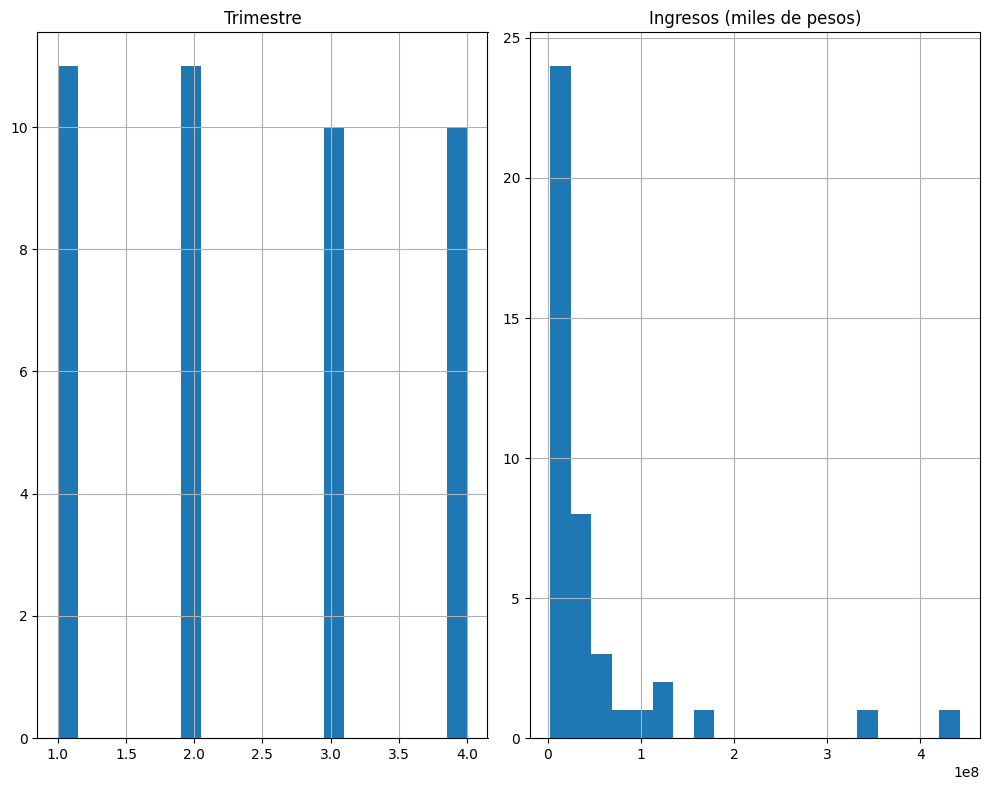

In [17]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
                           Trimestre  Ingresos (miles de pesos)
Trimestre                   1.000000                  -0.115954
Ingresos (miles de pesos)  -0.115954                   1.000000


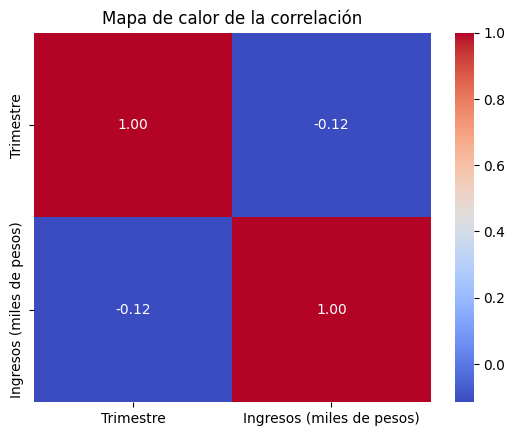

In [18]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [19]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Año y Periodo:
Periodo     Abr-Jun 2014  Abr-Jun 2015  Abr-Jun 2016  Abr-Jun 2017  \
Año                                                                  
2014-01-01             1             0             0             0   
2015-01-01             0             1             0             0   
2016-01-01             0             0             1             0   
2017-01-01             0             0             0             1   
2018-01-01             0             0             0             0   
2019-01-01             0             0             0             0   
2020-01-01             0             0             0             0   
2021-01-01             0             0             0             0   
2022-01-01             0             0             0             0   
2023-01-01             0             0             0             0   
2024-01-01             0             0             0             0   
2033-01-01             0             0         

Tabla de contingencia entre Año y Periodo:
Periodo     Abr-Jun 2014  Abr-Jun 2015  Abr-Jun 2016  Abr-Jun 2017  \
Año                                                                  
2014-01-01             1             0             0             0   
2015-01-01             0             1             0             0   
2016-01-01             0             0             1             0   
2017-01-01             0             0             0             1   
2018-01-01             0             0             0             0   
2019-01-01             0             0             0             0   
2020-01-01             0             0             0             0   
2021-01-01             0             0             0             0   
2022-01-01             0             0             0             0   
2023-01-01             0             0             0             0   
2024-01-01             0             0             0             0   
2033-01-01             0             0         

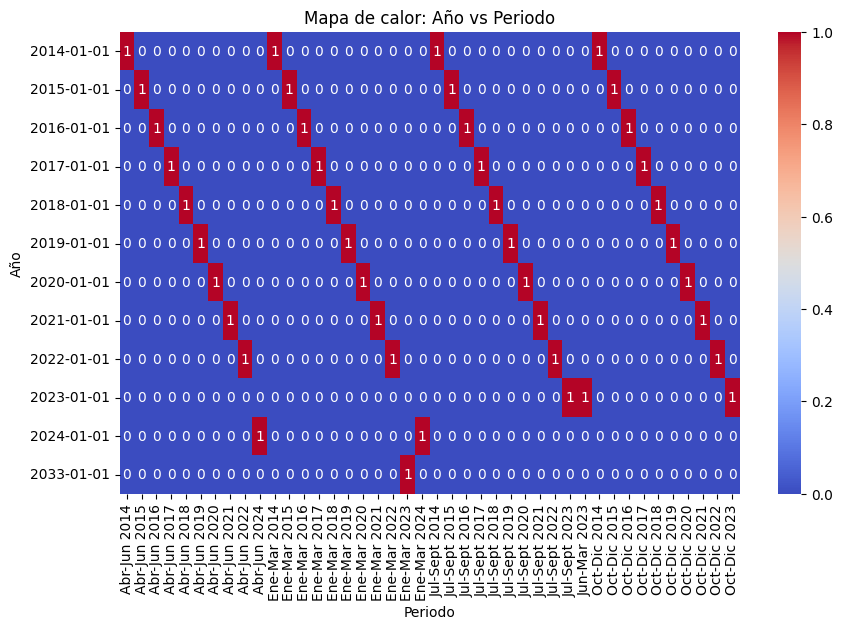

Tabla de contingencia entre Año y Trimestre_Label:
Trimestre_Label  Q1  Q2  Q3  Q4
Año                            
2014-01-01        1   1   1   1
2015-01-01        1   1   1   1
2016-01-01        1   1   1   1
2017-01-01        1   1   1   1
2018-01-01        1   1   1   1
2019-01-01        1   1   1   1
2020-01-01        1   1   1   1
2021-01-01        1   1   1   1
2022-01-01        1   1   1   1
2023-01-01        0   1   1   1
2024-01-01        1   1   0   0
2033-01-01        1   0   0   0


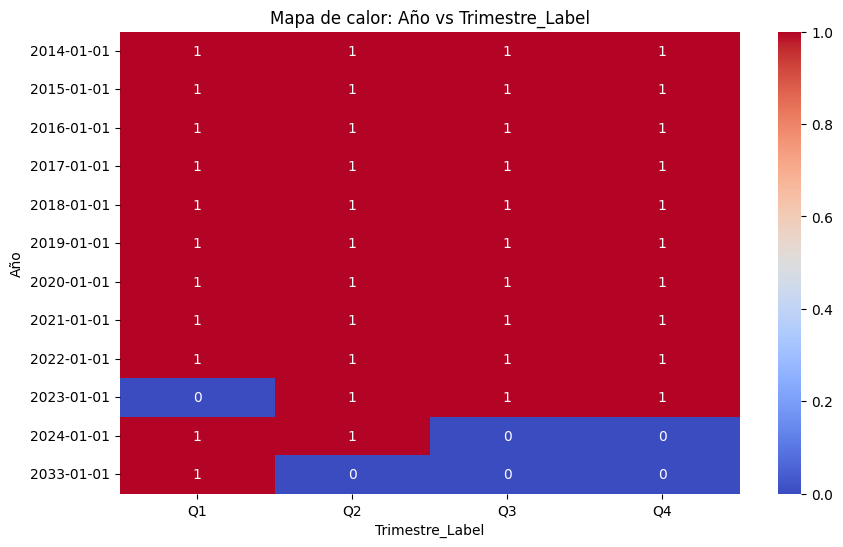

Tabla de contingencia entre Periodo y Año:
Año            2014-01-01  2015-01-01  2016-01-01  2017-01-01  2018-01-01  \
Periodo                                                                     
Abr-Jun 2014            1           0           0           0           0   
Abr-Jun 2015            0           1           0           0           0   
Abr-Jun 2016            0           0           1           0           0   
Abr-Jun 2017            0           0           0           1           0   
Abr-Jun 2018            0           0           0           0           1   
Abr-Jun 2019            0           0           0           0           0   
Abr-Jun 2020            0           0           0           0           0   
Abr-Jun 2021            0           0           0           0           0   
Abr-Jun 2022            0           0           0           0           0   
Abr-Jun 2024            0           0           0           0           0   
Ene-Mar 2014            1        

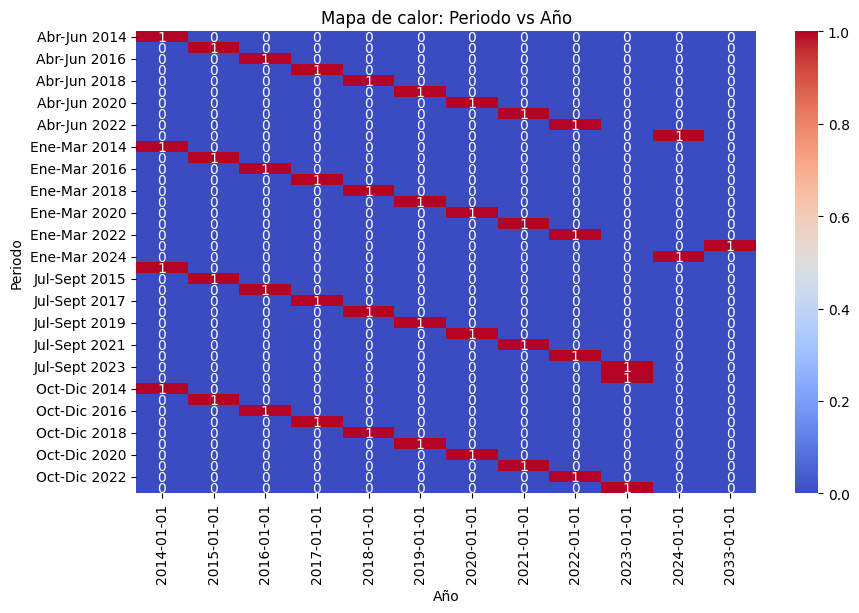

Tabla de contingencia entre Periodo y Trimestre_Label:
Trimestre_Label  Q1  Q2  Q3  Q4
Periodo                        
Abr-Jun 2014      0   1   0   0
Abr-Jun 2015      0   1   0   0
Abr-Jun 2016      0   1   0   0
Abr-Jun 2017      0   1   0   0
Abr-Jun 2018      0   1   0   0
Abr-Jun 2019      0   1   0   0
Abr-Jun 2020      0   1   0   0
Abr-Jun 2021      0   1   0   0
Abr-Jun 2022      0   1   0   0
Abr-Jun 2024      0   1   0   0
Ene-Mar 2014      1   0   0   0
Ene-Mar 2015      1   0   0   0
Ene-Mar 2016      1   0   0   0
Ene-Mar 2017      1   0   0   0
Ene-Mar 2018      1   0   0   0
Ene-Mar 2019      1   0   0   0
Ene-Mar 2020      1   0   0   0
Ene-Mar 2021      1   0   0   0
Ene-Mar 2022      1   0   0   0
Ene-Mar 2023      1   0   0   0
Ene-Mar 2024      1   0   0   0
Jul-Sept 2014     0   0   1   0
Jul-Sept 2015     0   0   1   0
Jul-Sept 2016     0   0   1   0
Jul-Sept 2017     0   0   1   0
Jul-Sept 2018     0   0   1   0
Jul-Sept 2019     0   0   1   0
Jul-Sept 2020    

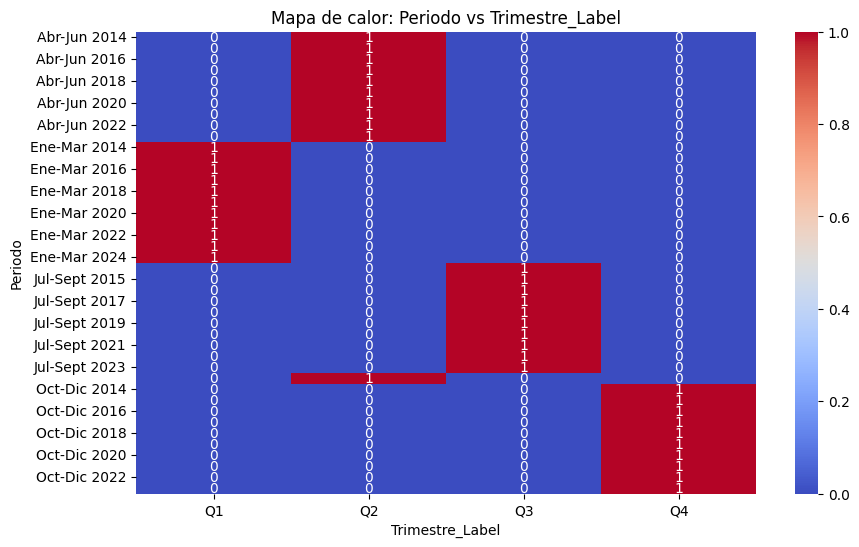

Tabla de contingencia entre Trimestre_Label y Año:
Año              2014-01-01  2015-01-01  2016-01-01  2017-01-01  2018-01-01  \
Trimestre_Label                                                               
Q1                        1           1           1           1           1   
Q2                        1           1           1           1           1   
Q3                        1           1           1           1           1   
Q4                        1           1           1           1           1   

Año              2019-01-01  2020-01-01  2021-01-01  2022-01-01  2023-01-01  \
Trimestre_Label                                                               
Q1                        1           1           1           1           0   
Q2                        1           1           1           1           1   
Q3                        1           1           1           1           1   
Q4                        1           1           1           1           1   


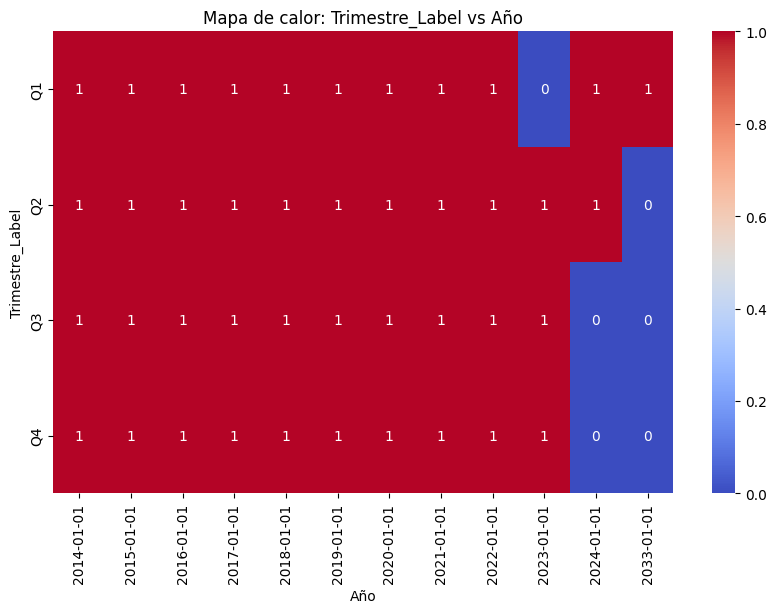

Tabla de contingencia entre Trimestre_Label y Periodo:
Periodo          Abr-Jun 2014  Abr-Jun 2015  Abr-Jun 2016  Abr-Jun 2017  \
Trimestre_Label                                                           
Q1                          0             0             0             0   
Q2                          1             1             1             1   
Q3                          0             0             0             0   
Q4                          0             0             0             0   

Periodo          Abr-Jun 2018  Abr-Jun 2019  Abr-Jun 2020  Abr-Jun 2021  \
Trimestre_Label                                                           
Q1                          0             0             0             0   
Q2                          1             1             1             1   
Q3                          0             0             0             0   
Q4                          0             0             0             0   

Periodo          Abr-Jun 2022  Abr-Jun 2024

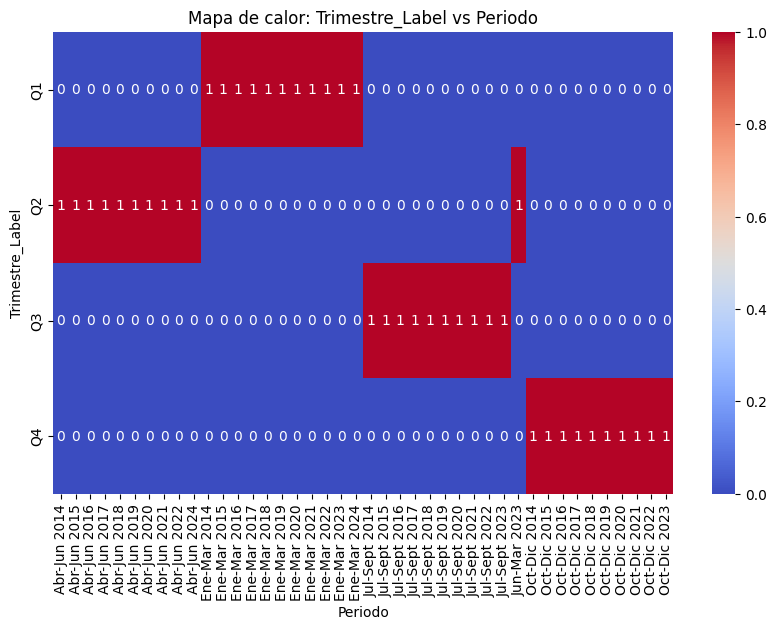

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


In [21]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
    Trimestre  Ingresos (miles de pesos)
0   -0.404989                   4.555202
1   -1.300229                   3.441625
2    1.385490                   1.363712
3    0.490250                   0.965503
4   -0.404989                   0.790665
5   -1.300229                   0.628854
6    1.385490                   0.260601
7    0.490250                   0.163496
8   -0.404989                   0.120883
9   -1.300229                   0.060457
10   1.385490                  -0.052854
11   0.490250                  -0.081532
12  -0.404989                  -0.136846
13  -1.300229                  -0.155011
14   1.385490                  -0.191459
15   0.490250                  -0.209380
16  -0.404989                  -0.208160
17  -1.300229                  -0.233215
18   1.385490                  -0.300343
19   0.490250                  -0.329585
20  -0.404989                  -0.340155
21  -1.300229                  -0.346380
22   1.385490       

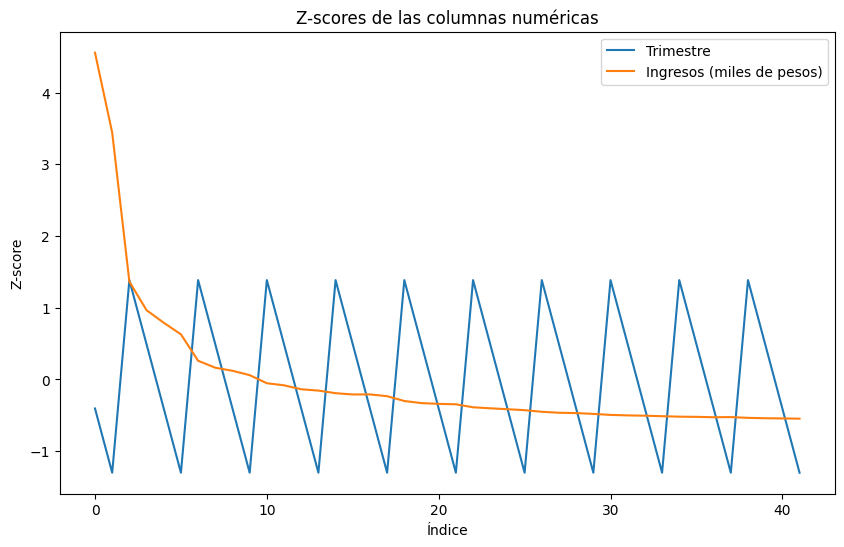

In [22]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [23]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Año':
Año
2022-01-01    4
2019-01-01    4
2020-01-01    4
2021-01-01    4
2017-01-01    4
2016-01-01    4
2015-01-01    4
2018-01-01    4
2014-01-01    4
2023-01-01    3
2024-01-01    2
2033-01-01    1
Name: count, dtype: int64

Conteo de categorías en la columna 'Periodo':
Periodo
Abr-Jun 2024     1
Ene-Mar 2024     1
Oct-Dic 2023     1
Jul-Sept 2023    1
Jun-Mar 2023     1
Ene-Mar 2023     1
Oct-Dic 2022     1
Jul-Sept 2022    1
Abr-Jun 2022     1
Ene-Mar 2022     1
Oct-Dic 2021     1
Jul-Sept 2021    1
Abr-Jun 2021     1
Ene-Mar 2021     1
Oct-Dic 2020     1
Jul-Sept 2020    1
Abr-Jun 2020     1
Ene-Mar 2020     1
Oct-Dic 2019     1
Jul-Sept 2019    1
Abr-Jun 2019     1
Ene-Mar 2019     1
Oct-Dic 2018     1
Jul-Sept 2018    1
Abr-Jun 2018     1
Ene-Mar 2018     1
Oct-Dic 2017     1
Jul-Sept 2017    1
Abr-Jun 2017     1
Ene-Mar 2017     1
Oct-Dic 2016     1
Jul-Sept 2016    1
Abr-Jun 2016     1
Ene-Mar 2016     1
Oct-Dic 2015     1
Jul-Sept 2015  

In [24]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


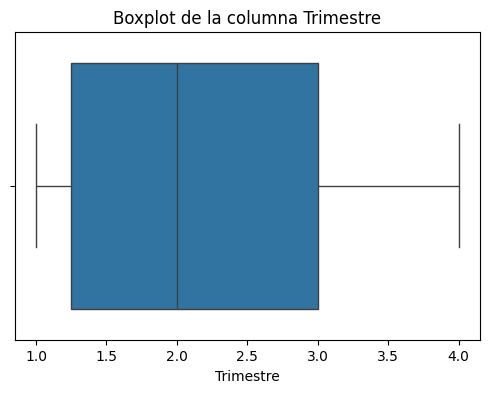

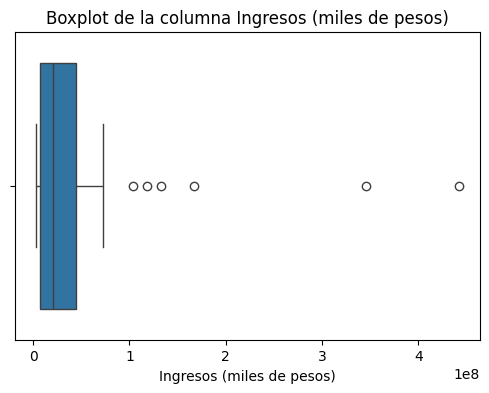

In [25]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [26]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
Trimestre_Label              0
dtype: int64


In [27]:
# Visualizar distribuciones de columnas con valores negativos
for columna in columnas_negativas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=20)
    plt.title(f"Distribución de la columna '{columna}' con valores negativos")
    plt.show()

In [28]:
# Contar cuántos valores negativos hay en cada columna
for columna in columnas_negativas:
    negativos = df[columna] < 0
    print(f"\nValores negativos en la columna '{columna}': {negativos.sum()}")

In [29]:
# Reemplazar valores negativos por NaN
df.loc[df.select_dtypes(include=[np.number]).lt(0).any(axis=1), columnas_negativas] = np.nan
print("\nValores negativos reemplazados por NaN.")


Valores negativos reemplazados por NaN.


In [30]:
# Confirmar que los valores negativos han sido reemplazados por NaN
print("\nConfirmando reemplazo de valores negativos por NaN:")
print(df.isnull().sum())


Confirmando reemplazo de valores negativos por NaN:
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
Trimestre_Label              0
dtype: int64


In [31]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO\Ingresos .csv


In [32]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Trimestre                    0.070729
Ingresos (miles de pesos)    3.381631
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Trimestre                    -1.371727
Ingresos (miles de pesos)    12.292935
dtype: float64


In [33]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
                    Variable       VIF
0                      const  6.528101
1                  Trimestre  1.013629
2  Ingresos (miles de pesos)  1.013629


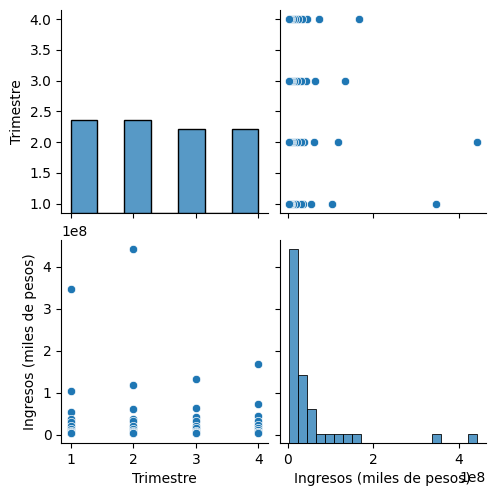

In [34]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [35]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Año':
           Trimestre                                            \
               count mean       std  min   25%  50%   75%  max   
Año                                                              
2014-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0   
2015-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0   
2016-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0   
2017-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0   
2018-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0   
2019-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0   
2020-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0   
2021-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0   
2022-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0   
2023-01-01       3.0  3.0  1.000000  2.0  2.50  3.0  3.50  4.0   
2024-01-01       2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   
2033-01-01       1.0  1.0       NaN  1.0  

In [36]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Año':
            Trimestre  Ingresos (miles de pesos)
Año                                             
2014-01-01        2.5               3.420987e+06
2015-01-01        2.5               5.027204e+06
2016-01-01        2.5               6.716877e+06
2017-01-01        2.5               9.917993e+06
2018-01-01        2.5               1.488490e+07
2019-01-01        2.5               2.169313e+07
2020-01-01        2.5               3.189646e+07
2021-01-01        2.5               4.084597e+07
2022-01-01        2.5               6.304227e+07
2023-01-01        3.0               1.395143e+08
2024-01-01        1.5               3.941156e+08
2033-01-01        1.0               1.041350e+08


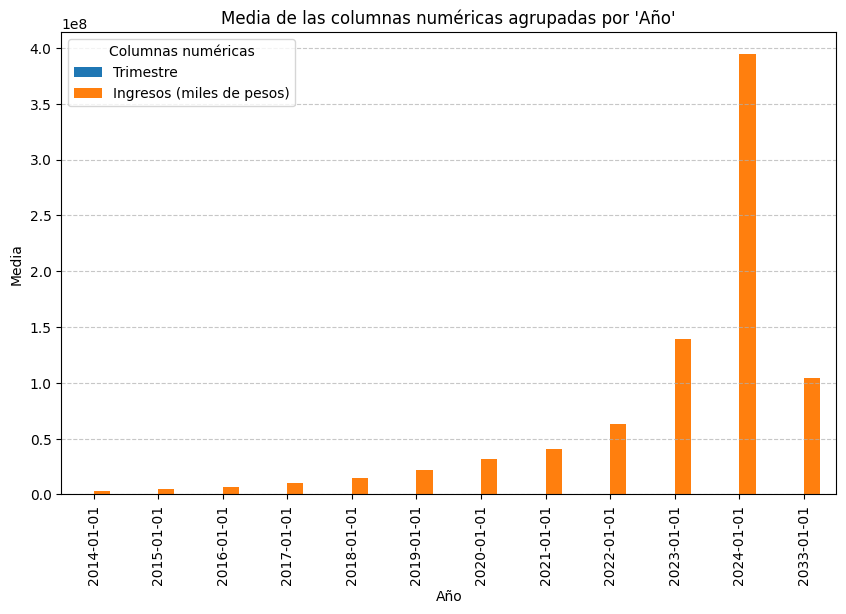


Estadísticas por grupo de 'Periodo':
               Trimestre  Ingresos (miles de pesos)
Periodo                                            
Abr-Jun 2014         2.0               3.270816e+06
Abr-Jun 2015         2.0               4.701791e+06
Abr-Jun 2016         2.0               6.534241e+06
Abr-Jun 2017         2.0               9.678647e+06
Abr-Jun 2018         2.0               1.431947e+07
Abr-Jun 2019         2.0               2.074312e+07
Abr-Jun 2020         2.0               3.210248e+07
Abr-Jun 2021         2.0               3.823967e+07
Abr-Jun 2022         2.0               6.041950e+07
Abr-Jun 2024         2.0               4.420322e+08
Ene-Mar 2014         1.0               2.984054e+06
Ene-Mar 2015         1.0               4.876385e+06
Ene-Mar 2016         1.0               5.936845e+06
Ene-Mar 2017         1.0               8.701201e+06
Ene-Mar 2018         1.0               1.317146e+07
Ene-Mar 2019         1.0               2.020741e+07
Ene-Mar 2020         1.0  

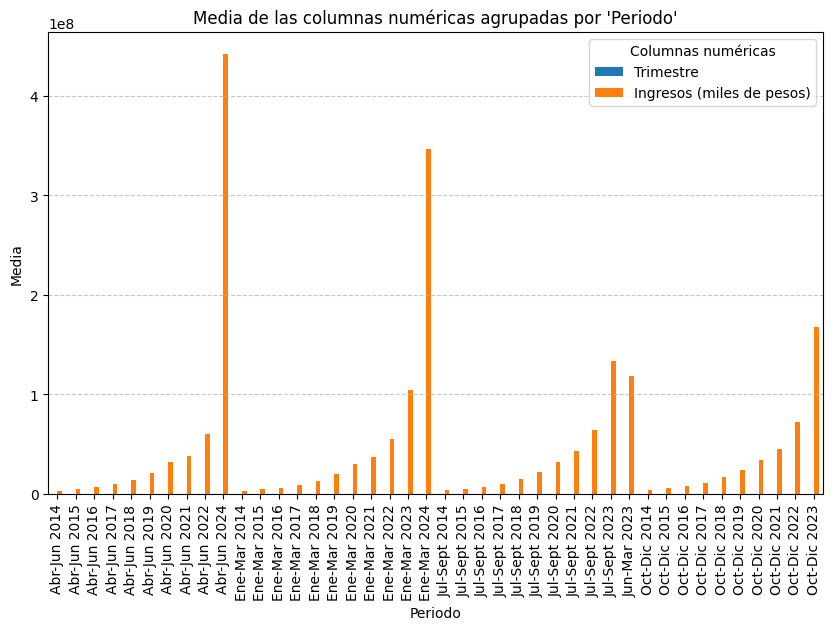


Estadísticas por grupo de 'Trimestre_Label':
                 Trimestre  Ingresos (miles de pesos)
Trimestre_Label                                      
Q1                     1.0               5.709575e+07
Q2                     2.0               6.819111e+07
Q3                     3.0               3.348653e+07
Q4                     4.0               3.876715e+07


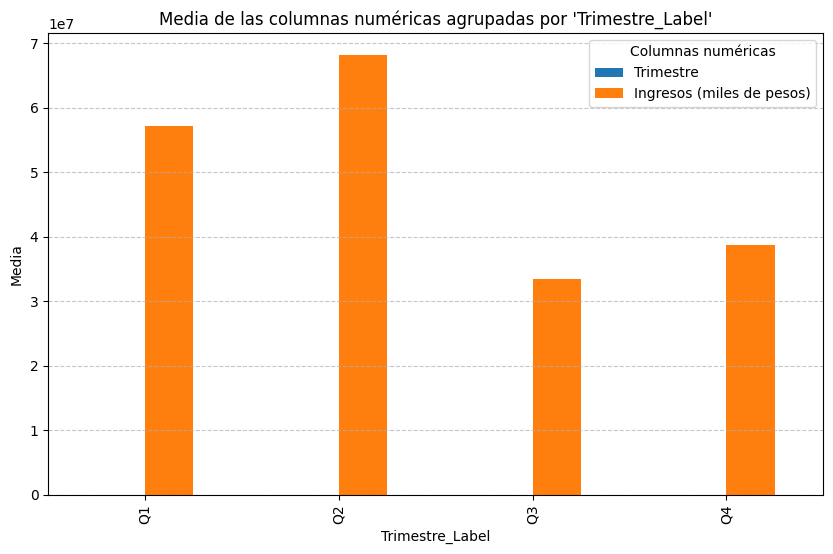

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
